# Circulant Matrices

## Overview

This lecture describes circulant matrices and some of their properties.

Circulant matrices have a special structure that connects them to  useful concepts
including

  * convolution
  * Fourier transforms
  * permutation matrices

Because of these connections, circulant matrices are widely used  in machine learning, for example, in image processing.


We begin by importing some Python packages

In [1]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.set_printoptions(precision=3, suppress=True)

## Constructing a Circulant Matrix

To construct an $N \times N$ circulant matrix, we  need only the first row, say,  

$$ \begin{bmatrix} c_{0} & c_{1} & c_{2} & c_{3} & c_{4} & \cdots & c_{N-1} \end{bmatrix} .$$

After setting entries in the first row, the remaining rows of a circulant matrix are determined as
follows:

$$
C=\left[\begin{array}{ccccccc}
c_{0} & c_{1} & c_{2} & c_{3} & c_{4} & \cdots & c_{N-1}\\
c_{N-1} & c_{0} & c_{1} & c_{2} & c_{3} & \cdots & c_{N-2}\\
c_{N-2} & c_{N-1} & c_{0} & c_{1} & c_{2} & \cdots & c_{N-3}\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
c_{3} & c_{4} & c_{5} & c_{6} & c_{7} & \cdots & c_{2}\\
c_{2} & c_{3} & c_{4} & c_{5} & c_{6} & \cdots & c_{1}\\
c_{1} & c_{2} & c_{3} & c_{4} & c_{5} & \cdots & c_{0}
\end{array}\right]
$$ (eqn:circulant)

It is also possible to construct a circulant matrix by creating the transpose of the above matrix, in which case only the
first column needs to be specified.

Let's write some Python code to generate a circulant matrix.

In [3]:
@njit
def construct_cirlulant(row):

    N = row.size
    
    C = np.empty((N, N))

    for i in range(N):

        C[i, i:] = row[:N-i]
        C[i, :i] = row[N-i:]

    return C

In [4]:
# a simple case when N = 3
construct_cirlulant(np.array([1., 2., 3.]))

array([[1., 2., 3.],
       [3., 1., 2.],
       [2., 3., 1.]])

### Some Properties of Circulant Matrices

Here are some useful properties:

Suppose that $A$ and $B$ are both circulant matrices. Then it can be verified that

 * The transpose of a circulant matrix is a circulant matrix.


 
  * $A + B$ is a circulant matrix
  * $A B$ is a circulant matrix
  * $A B = B A$ 

Now consider a circulant matrix with first row 

  $$  c = \begin{bmatrix} c_0 & c_1 & \cdots & c_{N-1} \end{bmatrix} $$

 and consider a vector 

 $$ a = \begin{bmatrix} a_0 & a_1 & \cdots  &  a_{N-1} \end{bmatrix} $$

 The **convolution** of  vectors $c$ and $a$ is defined   as the vector $b = c * a $  with components

$$
 b_k = \sum_{i=0}^{n-1} c_{k-i} a_i  
$$ (eqn:conv)

We use $*$ to denote **convolution** via the calculation described in equation {eq}`eqn:conv`.

It can be verified that the vector $b$ satisfies

$$ b = C^T a  $$

where $C^T$ is the transpose of the circulant matrix  defined in equation {eq}`eqn:circulant`.  





## Connection to Permutation Matrix

A good way to construct a circulant matrix is to use a **permutation matrix**.

Before defining a permutation **matrix**, we'll define a **permutation**.

A **permutation** of a set of the set of non-negative integers $\{0, 1, 2, \ldots \}$ is a one-to-one mapping of the set into itself.

A permutation of a set $\{1, 2, \ldots, n\}$ rearranges the $n$ integers in the set.  


A [permutation matrix](https://mathworld.wolfram.com/PermutationMatrix.html) is obtained by permuting the rows of an $n \times n$ identity matrix according to a permutation of the numbers $1$ to $n$. 


Thus, every row and every column contain precisely a single $1$ with $0$ everywhere else.

Every permutation corresponds to a unique permutation matrix.

For example, the $N \times N$ matrix

$$
P=\left[\begin{array}{cccccc}
0 & 1 & 0 & 0 & \cdots & 0\\
0 & 0 & 1 & 0 & \cdots & 0\\
0 & 0 & 0 & 1 & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \cdots & 1\\
1 & 0 & 0 & 0 & \cdots & 0
\end{array}\right]
$$ (eqn:exampleP)

serves as  a **cyclic shift**  operator that, when applied to an $N \times 1$ vector $h$, shifts entries in rows $2$ through $N$ up one row and shifts the entry in row $1$ to row $N$. 


Eigenvalues of  the cyclic shift permutation matrix $P$ defined in equation {eq}`eqn:exampleP` can be computed  by constructing

$$
P-\lambda I=\left[\begin{array}{cccccc}
-\lambda & 1 & 0 & 0 & \cdots & 0\\
0 & -\lambda & 1 & 0 & \cdots & 0\\
0 & 0 & -\lambda & 1 & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \cdots & 1\\
1 & 0 & 0 & 0 & \cdots & -\lambda
\end{array}\right]
$$

and solving 

$$
\textrm{det}(P - \lambda I) = (-1)^N \lambda^{N}-1=0
$$


Eigenvalues $\lambda_i$  can be complex.

Magnitudes $\mid \lambda_i \mid$  of these  eigenvalues $\lambda_i$ all equal  $1$.

Thus, **singular values** of the  permutation matrix $P$ defined in equation {eq}`eqn:exampleP` all equal $1$.

It can be verified that permutation matrices are orthogonal matrices:

$$
P P' = I 
$$




## Examples with Python

Let's write some Python code to illustrate these ideas.

In [5]:
@njit
def construct_P(N):

    P = np.zeros((N, N))

    for i in range(N-1):
        P[i, i+1] = 1
    P[-1, 0] = 1

    return P

In [6]:
P4 = construct_P(4)
P4

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [7]:
# compute the eigenvalues and eigenvectors
𝜆, Q = np.linalg.eig(P4)

In [8]:
for i in range(4):
    print(f'𝜆{i} = {𝜆[i]:.1f} \nvec{i} = {Q[i, :]}\n')

𝜆0 = -1.0+0.0j 
vec0 = [-0.5+0.j   0. +0.5j  0. -0.5j -0.5+0.j ]

𝜆1 = 0.0+1.0j 
vec1 = [ 0.5+0.j -0.5+0.j -0.5-0.j -0.5+0.j]

𝜆2 = 0.0-1.0j 
vec2 = [-0.5+0.j   0. -0.5j  0. +0.5j -0.5+0.j ]

𝜆3 = 1.0+0.0j 
vec3 = [ 0.5+0.j  0.5-0.j  0.5+0.j -0.5+0.j]



In graphs  below, we shall portray eigenvalues of a shift  permutation matrix   in the complex plane. 

These eigenvalues are uniformly distributed along the unit circle.

They are the **$n$ roots of unity**, meaning they are the $n$  numbers  $z$  that solve $z^n =1$, where $z$ is a complex number.

In particular, the $n$ roots of unity are

$$
z = \exp\left(\frac{2 \pi j k }{N} \right) , \quad k = 0, \ldots, N-1
$$

where $j$ denotes the purely imaginary unit number.

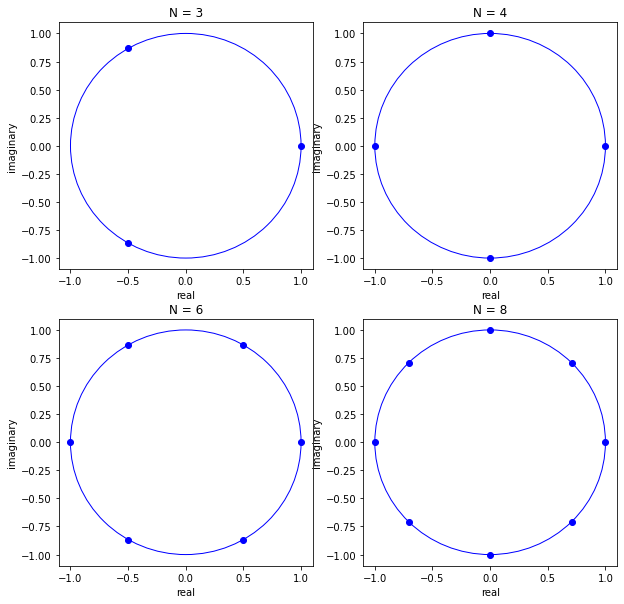

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, N in enumerate([3, 4, 6, 8]):

    row_i = i // 2
    col_i = i % 2

    P = construct_P(N)
    𝜆, Q = np.linalg.eig(P)

    circ = plt.Circle((0, 0), radius=1, edgecolor='b', facecolor='None')
    ax[row_i, col_i].add_patch(circ)

    for j in range(N):
        ax[row_i, col_i].scatter(𝜆[j].real, 𝜆[j].imag, c='b')

    ax[row_i, col_i].set_title(f'N = {N}')
    ax[row_i, col_i].set_xlabel('real')
    ax[row_i, col_i].set_ylabel('imaginary')

plt.show()

For a vector of  coefficients $\{c_i\}_{i=0}^{n-1}$, eigenvectors of $P$ are also  eigenvectors of 

$$
C = c_{0} I + c_{1} P + c_{2} P^{2} +\cdots + c_{N-1} P^{N-1}.
$$

Consider an example in which  $N=8$ and let $w = e^{-2 \pi j / N}$.

It can be verified that the matrix $F_8$ of eigenvectors of $P_{8}$  is

$$
F_{8}=\left[\begin{array}{ccccc}
1 & 1 & 1 & \cdots & 1\\
1 & w & w^{2} & \cdots & w^{7}\\
1 & w^{2} & w^{4} & \cdots & w^{14}\\
1 & w^{3} & w^{6} & \cdots & w^{21}\\
1 & w^{4} & w^{8} & \cdots & w^{28}\\
1 & w^{5} & w^{10} & \cdots & w^{35}\\
1 & w^{6} & w^{12} & \cdots & w^{42}\\
1 & w^{7} & w^{14} & \cdots & w^{49}
\end{array}\right]
$$

The matrix $F_8$ defines a  [Discete Fourier Transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform).

To convert it into an orthogonal eigenvector matrix, we can simply normalize it by dividing every entry  by $\sqrt{8}$. 

 *  stare at the first column of $F_8$ above to convince yourself of this fact 

The eigenvalues corresponding to each eigenvector are $\{w^{j}\}_{j=0}^{7}$ in order.

In [10]:
def construct_F(N):

    w = np.e ** (-np.complex(0, 2*np.pi/N))

    F = np.ones((N, N), dtype=np.complex)
    for i in range(1, N):
        F[i, 1:] = w ** (i * np.arange(1, N))

    return F, w

In [11]:
F8, w = construct_F(8)

/tmp/ipykernel_11100/903011294.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  w = np.e ** (-np.complex(0, 2*np.pi/N))
/tmp/ipykernel_11100/903011294.py:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  F = np.ones((N, N), dtype=np.complex)


In [12]:
w

(0.7071067811865476-0.7071067811865475j)

In [13]:
F8

array([[ 1.   +0.j   ,  1.   +0.j   ,  1.   +0.j   ,  1.   +0.j   ,
         1.   +0.j   ,  1.   +0.j   ,  1.   +0.j   ,  1.   +0.j   ],
       [ 1.   +0.j   ,  0.707-0.707j,  0.   -1.j   , -0.707-0.707j,
        -1.   -0.j   , -0.707+0.707j, -0.   +1.j   ,  0.707+0.707j],
       [ 1.   +0.j   ,  0.   -1.j   , -1.   -0.j   , -0.   +1.j   ,
         1.   +0.j   ,  0.   -1.j   , -1.   -0.j   , -0.   +1.j   ],
       [ 1.   +0.j   , -0.707-0.707j, -0.   +1.j   ,  0.707-0.707j,
        -1.   -0.j   ,  0.707+0.707j,  0.   -1.j   , -0.707+0.707j],
       [ 1.   +0.j   , -1.   -0.j   ,  1.   +0.j   , -1.   -0.j   ,
         1.   +0.j   , -1.   -0.j   ,  1.   +0.j   , -1.   -0.j   ],
       [ 1.   +0.j   , -0.707+0.707j,  0.   -1.j   ,  0.707+0.707j,
        -1.   -0.j   ,  0.707-0.707j, -0.   +1.j   , -0.707-0.707j],
       [ 1.   +0.j   , -0.   +1.j   , -1.   -0.j   ,  0.   -1.j   ,
         1.   +0.j   , -0.   +1.j   , -1.   -0.j   ,  0.   -1.j   ],
       [ 1.   +0.j   ,  0.707+0.707j, -0.

In [14]:
# normalize
Q8 = F8 / np.sqrt(8)

In [15]:
# verify the orthogonality (unitarity)
Q8 @ np.conjugate(Q8)

array([[ 1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [-0.-0.j,  1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,  0.+0.j,
         0.+0.j],
       [-0.-0.j, -0.-0.j,  1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,  0.+0.j,
         0.+0.j],
       [-0.-0.j, -0.-0.j, -0.-0.j,  1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j],
       [-0.-0.j, -0.-0.j, -0.-0.j, -0.-0.j,  1.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j],
       [ 0.-0.j, -0.-0.j, -0.-0.j, -0.-0.j, -0.-0.j,  1.+0.j, -0.+0.j,
        -0.+0.j],
       [ 0.-0.j,  0.-0.j,  0.-0.j, -0.-0.j, -0.-0.j, -0.-0.j,  1.+0.j,
        -0.+0.j],
       [ 0.-0.j,  0.-0.j,  0.-0.j, -0.-0.j, -0.-0.j, -0.-0.j, -0.-0.j,
         1.+0.j]])

Let's verify that $k$th column of $Q_{8}$ is an eigenvector of $P_{8}$ with an eigenvalue $w^{k}$.

In [16]:
P8 = construct_P(8)

In [17]:
diff_arr = np.empty(8, dtype=np.complex)
for j in range(8):
    diff = P8 @ Q8[:, j] - w ** j * Q8[:, j]
    diff_arr[j] = diff @ diff.T

/tmp/ipykernel_11100/646542455.py:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  diff_arr = np.empty(8, dtype=np.complex)


In [18]:
diff_arr

array([ 0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
       -0.+0.j])

## Associated Permutation Matrix 


Next, we execute calculations to verify that the circulant matrix $C$ defined  in equation {eq}`eqn:circulant` can be written as 


$$
C = c_{0} I + c_{1} P + \cdots + c_{n-1} P^{n-1}
$$

and that every eigenvector of $P$ is also an eigenvector of $C$.

We illustrate this for $N=8$ case.

In [19]:
c = np.random.random(8)

In [20]:
c

array([0.873, 0.241, 0.701, 0.546, 0.32 , 0.88 , 0.282, 0.474])

In [21]:
C8 = construct_cirlulant(c)

Compute $c_{0} I + c_{1} P + \cdots + c_{n-1} P^{n-1}$.

In [22]:
N = 8

C = np.zeros((N, N))
P = np.eye(N)

for i in range(N):
    C += c[i] * P
    P = P8 @ P

In [23]:
C

array([[0.873, 0.241, 0.701, 0.546, 0.32 , 0.88 , 0.282, 0.474],
       [0.474, 0.873, 0.241, 0.701, 0.546, 0.32 , 0.88 , 0.282],
       [0.282, 0.474, 0.873, 0.241, 0.701, 0.546, 0.32 , 0.88 ],
       [0.88 , 0.282, 0.474, 0.873, 0.241, 0.701, 0.546, 0.32 ],
       [0.32 , 0.88 , 0.282, 0.474, 0.873, 0.241, 0.701, 0.546],
       [0.546, 0.32 , 0.88 , 0.282, 0.474, 0.873, 0.241, 0.701],
       [0.701, 0.546, 0.32 , 0.88 , 0.282, 0.474, 0.873, 0.241],
       [0.241, 0.701, 0.546, 0.32 , 0.88 , 0.282, 0.474, 0.873]])

In [24]:
C8

array([[0.873, 0.241, 0.701, 0.546, 0.32 , 0.88 , 0.282, 0.474],
       [0.474, 0.873, 0.241, 0.701, 0.546, 0.32 , 0.88 , 0.282],
       [0.282, 0.474, 0.873, 0.241, 0.701, 0.546, 0.32 , 0.88 ],
       [0.88 , 0.282, 0.474, 0.873, 0.241, 0.701, 0.546, 0.32 ],
       [0.32 , 0.88 , 0.282, 0.474, 0.873, 0.241, 0.701, 0.546],
       [0.546, 0.32 , 0.88 , 0.282, 0.474, 0.873, 0.241, 0.701],
       [0.701, 0.546, 0.32 , 0.88 , 0.282, 0.474, 0.873, 0.241],
       [0.241, 0.701, 0.546, 0.32 , 0.88 , 0.282, 0.474, 0.873]])

Now let's compute the difference between two circulant matrices that we have  constructed in two different ways.

In [25]:
np.abs(C - C8).max()

0.0

The  $k$th column of $P_{8}$ associated with eigenvalue $w^{k-1}$ is an eigenvector of $C_{8}$ associated with an eigenvalue $\sum_{h=0}^{7} c_{j} w^{h k}$.

In [26]:
𝜆_C8 = np.zeros(8, dtype=np.complex)

for j in range(8):
    for k in range(8):
        𝜆_C8[j] += c[k] * w ** (j * k)

/tmp/ipykernel_11100/866898372.py:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  𝜆_C8 = np.zeros(8, dtype=np.complex)


In [27]:
𝜆_C8

array([4.316+0.j   , 0.051-0.019j, 0.21 -0.1j  , 1.056+0.82j ,
       0.035-0.j   , 1.056-0.82j , 0.21 +0.1j  , 0.051+0.019j])

We can verify this by comparing `C8 @ Q8[:, j]` with `𝜆_C8[j] * Q8[:, j]`.

In [28]:
# verify
for j in range(8):
    diff = C8 @ Q8[:, j] - 𝜆_C8[j] * Q8[:, j]
    print(diff)

[-0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j]
[-0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.+0.j]
[ 0.-0.j  0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j]
[-0.-0.j  0.-0.j -0.-0.j  0.-0.j -0.+0.j  0.-0.j -0.-0.j -0.+0.j]
[ 0.+0.j -0.-0.j  0.+0.j -0.-0.j  0.+0.j -0.-0.j  0.+0.j -0.-0.j]
[-0.+0.j -0.-0.j  0.+0.j -0.-0.j  0.-0.j -0.+0.j  0.-0.j  0.+0.j]
[-0.+0.j -0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j]
[0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.+0.j 0.+0.j]


## Discrete Fourier Transform

The **Discrete Fourier Transform** (DFT) allows us to  represent a  discrete time sequence as a weighted sum of complex sinusoids.

Consider a sequence of $N$ real number $\{x_j\}_{j=0}^{N-1}$. 

The **Discrete Fourier Transform** maps $\{x_j\}_{j=0}^{N-1}$ into a sequence of complex numbers $\{X_k\}_{k=0}^{N-1}$

where

$$
X_{k}=\sum_{n=0}^{N-1}x_{n}e^{-2\pi\frac{kn}{N}i}
$$

In [29]:
def DFT(x):
    "The discrete Fourier transform."

    N = len(x)
    w = np.e ** (-np.complex(0, 2*np.pi/N))

    X = np.zeros(N, dtype=np.complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * w ** (k * n)

    return X

Consider the following example.

$$
x_{n}=\begin{cases}
1/2 & n=0,1\\
0 & \text{otherwise}
\end{cases}
$$

In [30]:
x = np.zeros(10)
x[0:2] = 1/2

In [31]:
x

array([0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

Apply a discrete Fourier transform.

In [32]:
X = DFT(x)

/tmp/ipykernel_11100/1700622740.py:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  w = np.e ** (-np.complex(0, 2*np.pi/N))
/tmp/ipykernel_11100/1700622740.py:7: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros(N, dtype=np.complex)


In [33]:
X

array([ 1.   +0.j   ,  0.905-0.294j,  0.655-0.476j,  0.345-0.476j,
        0.095-0.294j, -0.   +0.j   ,  0.095+0.294j,  0.345+0.476j,
        0.655+0.476j,  0.905+0.294j])

We can plot  magnitudes of a sequence of numbers and the  associated discrete Fourier transform.

In [34]:
def plot_magnitude(x=None, X=None):

    data = []
    names = []
    xs = []
    if (x is not None):
        data.append(x)
        names.append('x')
        xs.append('n')
    if (X is not None):
        data.append(X)
        names.append('X')
        xs.append('j')

    num = len(data)
    for i in range(num):
        n = data[i].size
        plt.figure(figsize=(8, 3))
        plt.scatter(range(n), np.abs(data[i]))
        plt.vlines(range(n), 0, np.abs(data[i]), color='b')

        plt.xlabel(xs[i])
        plt.ylabel('magnitude')
        plt.title(names[i])
        plt.show()

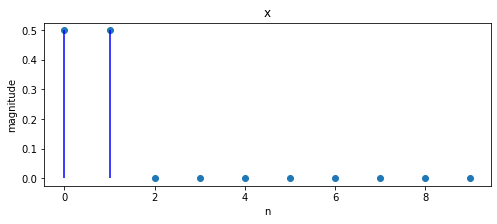

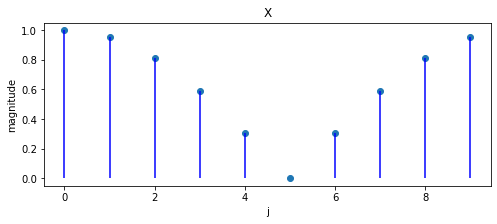

In [35]:
plot_magnitude(x=x, X=X)

The **inverse Fourier transform**  transforms a Fourier transform  $X$ of $x$  back to $x$.

The inverse Fourier transform is defined as

$$
x_{n} = \sum_{k=0}^{N-1} \frac{1}{N} X_{k} e^{2\pi\left(\frac{kn}{N}\right)i}, \quad n=0, 1, \ldots, N-1
$$

In [36]:
def inverse_transform(X):

    N = len(X)
    w = np.e ** (np.complex(0, 2*np.pi/N))

    x = np.zeros(N, dtype=np.complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * w ** (k * n) / N

    return x

In [37]:
inverse_transform(X)

/tmp/ipykernel_11100/1761241726.py:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  w = np.e ** (np.complex(0, 2*np.pi/N))
/tmp/ipykernel_11100/1761241726.py:6: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros(N, dtype=np.complex)


array([ 0.5+0.j,  0.5-0.j, -0. -0.j, -0. -0.j, -0. -0.j, -0. -0.j,
       -0. +0.j, -0. +0.j, -0. +0.j, -0. +0.j])

Another example is

$$
x_{n}=2\cos\left(2\pi\frac{11}{40}n\right),\ n=0,1,2,\cdots19
$$

Since $N=20$, we cannot use an integer multiple of $\frac{1}{20}$ to represent a frequency $\frac{11}{40}$.

To handle this,  we shall end up using all $N$ of the availble   frequencies in the DFT.

Since $\frac{11}{40}$ is in between $\frac{10}{40}$ and $\frac{12}{40}$ (each of which is an integer multiple of $\frac{1}{20}$), the complex coefficients in the DFT   have their  largest magnitudes at $k=5,6,15,16$, not just at a single frequency.

In [38]:
N = 20
x = np.empty(N)

for j in range(N):
    x[j] = 2 * np.cos(2 * np.pi * 11 * j / 40)

In [39]:
X = DFT(x)

/tmp/ipykernel_11100/1700622740.py:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  w = np.e ** (-np.complex(0, 2*np.pi/N))
/tmp/ipykernel_11100/1700622740.py:7: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros(N, dtype=np.complex)


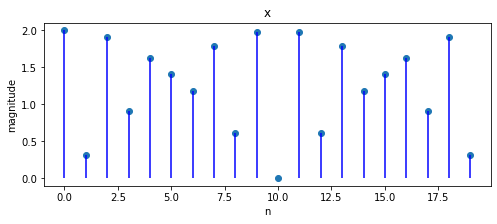

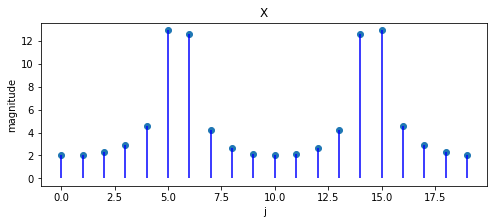

In [40]:
plot_magnitude(x=x, X=X)

What happens if we change the last example to $x_{n}=2\cos\left(2\pi\frac{10}{40}n\right)$? 

Note that $\frac{10}{40}$ is an integer multiple of $\frac{1}{20}$.

In [41]:
N = 20
x = np.empty(N)

for j in range(N):
    x[j] = 2 * np.cos(2 * np.pi * 10 * j / 40)

In [42]:
X = DFT(x)

/tmp/ipykernel_11100/1700622740.py:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  w = np.e ** (-np.complex(0, 2*np.pi/N))
/tmp/ipykernel_11100/1700622740.py:7: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros(N, dtype=np.complex)


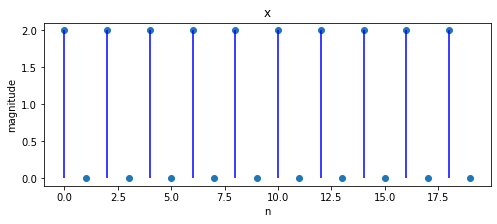

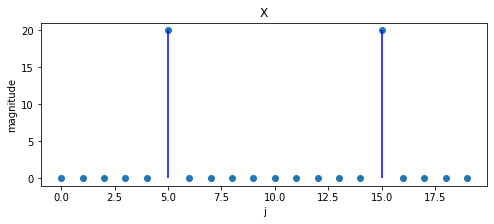

In [43]:
plot_magnitude(x=x, X=X)

If we represent the discrete Fourier transform as a matrix, we discover that it equals the  matrix $F_{N}$ of eigenvectors  of the permutation matrix $P_{N}$.

We can use the example where $x_{n}=2\cos\left(2\pi\frac{11}{40}n\right),\ n=0,1,2,\cdots19$ to illustrate this.

In [44]:
N = 20
x = np.empty(N)

for j in range(N):
    x[j] = 2 * np.cos(2 * np.pi * 11 * j / 40)

In [45]:
x

array([ 2.   , -0.313, -1.902,  0.908,  1.618, -1.414, -1.176,  1.782,
        0.618, -1.975, -0.   ,  1.975, -0.618, -1.782,  1.176,  1.414,
       -1.618, -0.908,  1.902,  0.313])

First use the summation formula to transform $x$ to $X$.

In [46]:
X = DFT(x)
X

/tmp/ipykernel_11100/1700622740.py:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  w = np.e ** (-np.complex(0, 2*np.pi/N))
/tmp/ipykernel_11100/1700622740.py:7: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros(N, dtype=np.complex)


array([2. +0.j   , 2. +0.558j, 2. +1.218j, 2. +2.174j, 2. +4.087j,
       2.+12.785j, 2.-12.466j, 2. -3.751j, 2. -1.801j, 2. -0.778j,
       2. -0.j   , 2. +0.778j, 2. +1.801j, 2. +3.751j, 2.+12.466j,
       2.-12.785j, 2. -4.087j, 2. -2.174j, 2. -1.218j, 2. -0.558j])

Now let's evaluate the outcome  of postmultiplying  the eigenvector matrix  $F_{20}$ by the vector $x$, a product that we claim should equal the Fourier tranform of the sequence $\{x_n\}_{n=0}^{N-1}$.

In [47]:
F20, _ = construct_F(20)

/tmp/ipykernel_11100/903011294.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  w = np.e ** (-np.complex(0, 2*np.pi/N))
/tmp/ipykernel_11100/903011294.py:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  F = np.ones((N, N), dtype=np.complex)


In [48]:
F20 @ x

array([2. +0.j   , 2. +0.558j, 2. +1.218j, 2. +2.174j, 2. +4.087j,
       2.+12.785j, 2.-12.466j, 2. -3.751j, 2. -1.801j, 2. -0.778j,
       2. -0.j   , 2. +0.778j, 2. +1.801j, 2. +3.751j, 2.+12.466j,
       2.-12.785j, 2. -4.087j, 2. -2.174j, 2. -1.218j, 2. -0.558j])

Similarly, the inverse DFT can be expressed as a inverse DFT matrix $F^{-1}_{20}$.

In [49]:
F20_inv = np.linalg.inv(F20)
F20_inv @ X

array([ 2.   +0.j, -0.313+0.j, -1.902-0.j,  0.908+0.j,  1.618+0.j,
       -1.414-0.j, -1.176-0.j,  1.782-0.j,  0.618+0.j, -1.975+0.j,
       -0.   -0.j,  1.975+0.j, -0.618+0.j, -1.782-0.j,  1.176-0.j,
        1.414+0.j, -1.618+0.j, -0.908-0.j,  1.902-0.j,  0.313+0.j])